In [192]:
#pip install yfinance
#from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
#import talib as ta
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.pipeline import Pipeline
#from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
#from sklearn import preprocessing
#from sklearn import utils

# Open data

In [164]:
#Open Data, generated in the last question.
df=pd.read_csv('BTC_TECH_ANAL1.csv')
df=df.drop(['Date'], axis=1)
df.head()

,Close,Open_lag1,High_lag1,Low_lag1,Close_lag1,Adj Close_lag1,Volume_lag1,AROONOSC_lag1,RSI_lag1,RSI1_lag1,...,AD_lag1,OBV_lag1,ATR_lag1,NATR_lag1,TRANGE_lag1,CDLENGULFING_lag1,CDLHANGINGMAN_lag1,CDLSHOOTINGSTAR_lag1,CDLHAMMER_lag1,Unnamed: 21
0,5647.209961,4829.580078,5446.910156,4822.000000,5446.910156,5446.910156,2.791610e+09,100.000000,95.599259,94.035177,...,5.757130e+09,1.382015e+10,245.291755,3.627589,197.591518,0,0,0,0,NaN
1,5831.790039,5464.160156,5840.299805,5436.850098,5647.209961,5647.209961,3.615480e+09,100.000000,96.443426,95.086632,...,5.911893e+09,1.743563e+10,271.651413,3.759302,212.295674,0,0,0,0,NaN
2,5678.189941,5643.529785,5837.700195,5591.640137,5831.790039,5831.790039,1.669030e+09,83.333333,97.065831,95.869436,...,7.500746e+09,1.910466e+10,267.386188,3.681673,214.707416,0,0,0,0,NaN
3,5725.589844,5835.959961,5852.479980,5478.609863,5678.189941,5678.189941,1.976040e+09,100.000000,82.626458,83.027013,...,7.634413e+09,1.712862e+10,285.133509,3.981483,226.076180,0,0,0,0,NaN
4,5605.509766,5687.569824,5776.229980,5544.209961,5725.589844,5725.589844,2.008070e+09,66.666667,83.533546,83.807925,...,8.765930e+09,1.913669e+10,276.281261,3.955937,226.500740,0,0,0,0,NaN


In [165]:
#Scale Data
sc_x = StandardScaler() 
df = pd.DataFrame(sc_x.fit_transform(df), index=df.index, columns=df.columns)
df.head()

C:\Users\rperu\.conda\envs\6.16Notebook\lib\site-packages\sklearn\utils\extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\rperu\.conda\envs\6.16Notebook\lib\site-packages\sklearn\utils\extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,Close,Open_lag1,High_lag1,Low_lag1,Close_lag1,Adj Close_lag1,Volume_lag1,AROONOSC_lag1,RSI_lag1,RSI1_lag1,...,AD_lag1,OBV_lag1,ATR_lag1,NATR_lag1,TRANGE_lag1,CDLENGULFING_lag1,CDLHANGINGMAN_lag1,CDLSHOOTINGSTAR_lag1,CDLHAMMER_lag1,Unnamed: 21
0,-0.597295,-0.655132,-0.618715,-0.648627,-0.610880,-0.610880,-0.939627,1.342751,2.105452,2.150025,...,-0.898040,-0.981391,-0.540105,-0.561928,-0.596830,-0.03621,0.139923,0.102214,-0.191712,NaN
1,-0.583732,-0.608448,-0.590691,-0.601531,-0.596153,-0.596153,-0.901948,1.342751,2.147278,2.205231,...,-0.897897,-0.975774,-0.515933,-0.513524,-0.582666,-0.03621,0.139923,0.102214,-0.191712,NaN
2,-0.595019,-0.595252,-0.590876,-0.589675,-0.582581,-0.582581,-0.990966,1.099007,2.178116,2.246332,...,-0.896427,-0.973181,-0.519844,-0.542052,-0.580343,-0.03621,0.139923,0.102214,-0.191712,NaN
3,-0.591536,-0.581096,-0.589823,-0.598333,-0.593875,-0.593875,-0.976926,1.342751,1.462691,1.572051,...,-0.896304,-0.976251,-0.503570,-0.431875,-0.569392,-0.03621,0.139923,0.102214,-0.191712,NaN
4,-0.600359,-0.592013,-0.595255,-0.593308,-0.590390,-0.590390,-0.975461,0.855263,1.507634,1.613052,...,-0.895257,-0.973132,-0.511687,-0.441263,-0.568983,-0.03621,0.139923,0.102214,-0.191712,NaN


In [167]:
#Separate the dataset in dependent an independent variables
# X tech indicators without high correlated variables
X=df.drop(['Close','Open_lag1','High_lag1','Low_lag1','Close_lag1','Adj Close_lag1','Volume_lag1','Unnamed: 21','ATR_lag1','RSI1_lag1','AD_lag1'], axis=1)
# y is Close BTC Price
y=df['Close']

# Correlation

,AROONOSC_lag1,RSI_lag1,DX_lag1,OBV_lag1,NATR_lag1,TRANGE_lag1,CDLENGULFING_lag1,CDLHANGINGMAN_lag1,CDLSHOOTINGSTAR_lag1,CDLHAMMER_lag1
AROONOSC_lag1,1.000000,0.751186,0.066016,0.114718,-0.177959,-0.031008,0.069388,-0.005549,-0.044710,-0.095964
RSI_lag1,0.751186,1.000000,0.047264,0.164944,-0.267501,-0.051737,0.166334,-0.047903,-0.067331,-0.096228
DX_lag1,0.066016,0.047264,1.000000,0.024605,-0.009513,0.001504,-0.015437,0.037952,-0.024863,-0.024902
OBV_lag1,0.114718,0.164944,0.024605,1.000000,0.095164,0.748881,0.057848,-0.010977,0.009854,-0.035679
NATR_lag1,-0.177959,-0.267501,-0.009513,0.095164,1.000000,0.577738,-0.083389,0.013482,0.029817,0.013423
TRANGE_lag1,-0.031008,-0.051737,0.001504,0.748881,0.577738,1.000000,0.009727,0.009415,0.019172,-0.033627
CDLENGULFING_lag1,0.069388,0.166334,-0.015437,0.057848,-0.083389,0.009727,1.000000,0.020587,0.003701,-0.018461
CDLHANGINGMAN_lag1,-0.005549,-0.047903,0.037952,-0.010977,0.013482,0.009415,0.020587,1.000000,-0.014302,-0.031382
CDLSHOOTINGSTAR_lag1,-0.044710,-0.067331,-0.024863,0.009854,0.029817,0.019172,0.003701,-0.014302,1.000000,0.019596
CDLHAMMER_lag1,-0.095964,-0.096228,-0.024902,-0.035679,0.013423,-0.033627,-0.018461,-0.031382,0.019596,1.000000


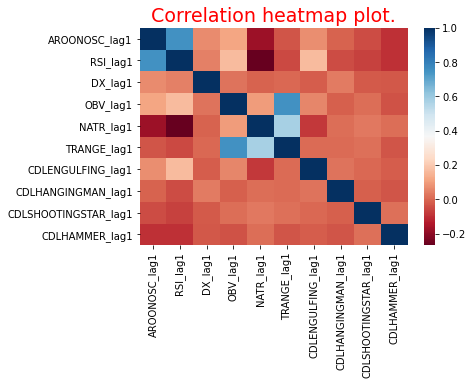

In [26]:
#Drop correlated variables ATR_lag1, RSI1_lag1 & AD_lag1
corr=X.corr()
display(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')
plt.title('Correlation heatmap plot.', fontsize=19,  color='red')
plt.show()

In [168]:
# Split Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [243]:
# BTC actual Prices
BTC_actual=y

# 3.3 Support Vector Machines

In [245]:
#Support Vector Model
from sklearn import svm
svm_= svm.SVR()
svm_.fit(X_train,y_train)
y_predict=svm_.predict(X_test)

In [246]:
#Mean Squared Error
print(mean_squared_error(y_test, y_predict))

0.02285196979689184


In [257]:
#Coefficients
coef=cross_val_score(dt, X_train, y_train, cv=10)
coef


array([0.99081288, 0.97989031, 0.98536138, 0.9840649 , 0.99086431,
       0.99232331, 0.98230394, 0.99353539, 0.98806887, 0.98651621])

In [258]:
#BTC Fitted Values
BTC_fitted= X.dot(coef)
BTC_actual=y

Text(0.5, 0, 'Ordinary Least Squares Regression')

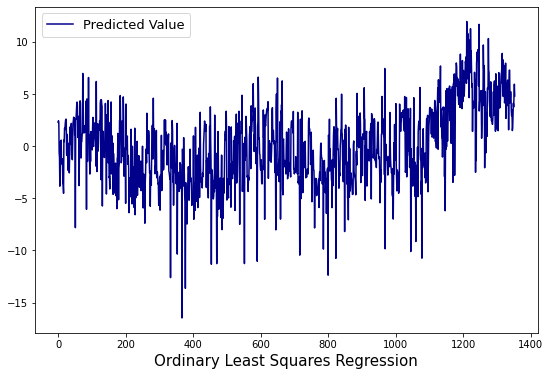

In [259]:
#Comparisson of BTC actual values and predicted values
plt.figure(figsize=(9, 6))
plt.plot(BTC_fitted.index, BTC_fitted, c='darkblue',label='Predicted Value')
#plt.plot(BTC_fitted.index, BTC_actual, c='red',label='Actual BTC Value')
plt.legend(prop=dict(size=13))
plt.xlabel('Ordinary Least Squares Regression', fontsize=15)
#plt.show()

# 3.4 Decision Tree Model

In [251]:
# Decision Tree
from sklearn import tree
dt= tree.DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
y_predict=dt.predict(X_test)

In [252]:
print(mean_squared_error(y_test, y_predict))

0.011348877753254107


In [253]:
#Coefficients
coef=cross_val_score(dt, X_train, y_train, cv=10)
coef


array([0.99081288, 0.97989031, 0.98536138, 0.9840649 , 0.99086431,
       0.99232331, 0.98230394, 0.99353539, 0.98806887, 0.98651621])

In [256]:
get_params(deep=True)

NameError: name 'get_params' is not defined

In [254]:
#BTC Fitted Values
BTC_fitted= X.dot(coef)
BTC_actual=y

Text(0.5, 0, 'Ordinary Least Squares Regression')

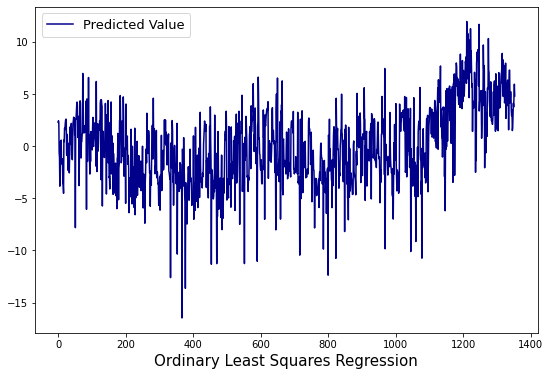

In [255]:
#Comparisson of BTC actual values and predicted values
plt.figure(figsize=(9, 6))
plt.plot(BTC_fitted.index, BTC_fitted, c='darkblue',label='Predicted Value')
#plt.plot(BTC_fitted.index, BTC_actual, c='red',label='Actual BTC Value')
plt.legend(prop=dict(size=13))
plt.xlabel('Ordinary Least Squares Regression', fontsize=15)
#plt.show()

# 3.5 Ordinary Least Squares

In [217]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_predict=reg.predict(X_test)

In [218]:
#Mean Squared Error
print(mean_squared_error(y_test, y_predict))

0.059052961355928475


In [201]:
#Coefficients
coef=reg.coef_
coef

array([ 1.96836247e-02,  1.90074584e-02,  7.61277692e-03,  2.70343619e-01,
       -2.09617063e-01,  8.37545433e-01, -1.44895024e-02, -1.34981699e-03,
       -4.97633469e-03,  5.12264807e-05])

In [203]:
#BTC Fitted Values
BTC_fitted= X.dot(coef)
BTC_actual=y

Text(0.5, 0, 'Ordinary Least Squares Regression')

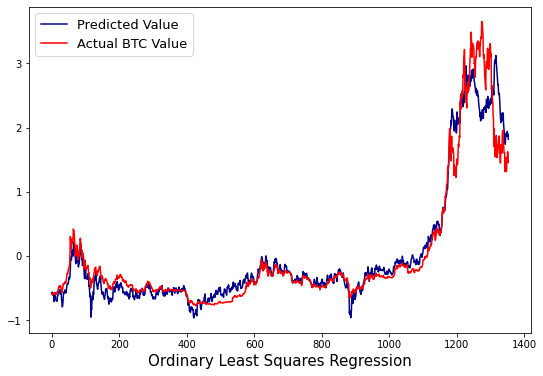

In [208]:
#Comparisson of BTC actual values and predicted values
plt.figure(figsize=(9, 6))
plt.plot(BTC_fitted.index, BTC_fitted, c='darkblue',label='Predicted Value')
plt.plot(BTC_fitted.index, BTC_actual, c='red',label='Actual BTC Value')
plt.legend(prop=dict(size=13))
plt.xlabel('Ordinary Least Squares Regression', fontsize=15)
#plt.show()

# 3.6. Bayesian Regression

In [219]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train,y_train)
y_predict=reg.predict(X_test)

In [220]:
#Mean Squared Error
print(mean_squared_error(y_test, y_predict))

0.058938666322142536


In [214]:
#Coefficients
coef=reg.coef_

In [215]:
#BTC_actual=data_scaled[['Close']]  es y
BTC_fitted= X.dot(coef)
#acrual values is y
BTC_actual=y

Text(0.5, 0, 'Bayesian Regression')

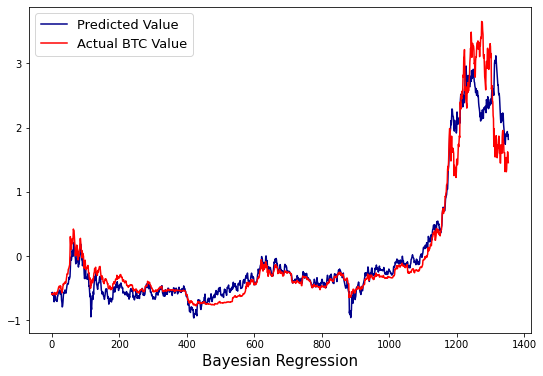

In [216]:
#Comparisson of BTC actual values and predicted values
plt.figure(figsize=(9, 6))
plt.plot(BTC_fitted.index, BTC_fitted, c='darkblue',label='Predicted Value')
plt.plot(BTC_fitted.index, BTC_actual, c='red',label='Actual BTC Value')
plt.legend(prop=dict(size=13))
plt.xlabel('Bayesian Regression', fontsize=15)


# ElasticNet 

In [142]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.0001, l1_ratio=0.5,normalize=False)
model.fit(X_train, y_train)
y_predict=reg.predict(X_test)

In [143]:
print(mean_squared_error(y_test, y_predict))

10916266.716870684


In [144]:
model.coef_

array([ 2.69263315e+02,  2.59474428e+02,  1.04308226e+02,  3.76963049e+03,
       -2.88395764e+03,  1.15162019e+04, -2.01805573e+02, -1.80978355e+01,
       -6.27440087e+01,  6.10687394e-01])

In [586]:
#Coefficients for each variable
coef = list(model.coef_)
count = 0
for i in X.columns:
    print(i,':',coef[count])
    count+= 1

AROONOSC_lag1 : 0.0034852923505982103
RSI_lag1 : -0.0
RSI1_lag1 : 0.01142857285654937
DX_lag1 : 0.0038680399481646906
AD_lag1 : 0.10642634384873408
OBV_lag1 : 0.07328293186382188
ATR_lag1 : 0.06474945481246612
NATR_lag1 : -0.1511765509819744
TRANGE_lag1 : 0.7826581067274684
CDLENGULFING_lag1 : -0.002606840947162683
CDLHANGINGMAN_lag1 : 0.00017576926266141138
CDLSHOOTINGSTAR_lag1 : 5.4012996158095144e-05
CDLHAMMER_lag1 : 0.0002688964817339358


In [587]:
#Forecast Values of BTC
BTC_fitted= X.dot(coef)
BTC_fitted.tail()

Date
2021-06-27    1.986563
2021-06-28    2.009079
2021-06-29    1.914264
2021-06-30    1.913477
2021-07-01    1.846690
dtype: float64

In [588]:
#Actual Values of BTC (scaled)
BTC_actual=data_scaled[['Close']]
BTC_actual.tail()

,Close
Date,
2021-06-27,1.533786
2021-06-28,1.517965
2021-06-29,1.623294
2021-06-30,1.562531
2021-07-01,1.454610


Text(0.5, 0, 'DATE')

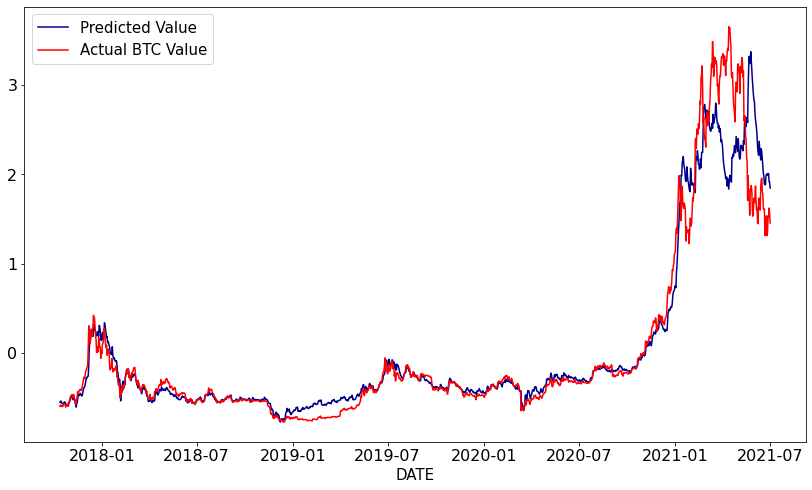

In [589]:
#Comparisson of BTC actual values and predicted values
plt.figure(figsize=(14, 8))
plt.plot(data_scaled.index, BTC_fitted, c='darkblue',label='Predicted Value')
plt.plot(data_scaled.index, BTC_actual, c='red',label='Actual BTC Value')
plt.legend(prop=dict(size=15))
plt.xlabel('DATE', fontsize=15)

### Mean Squared Error

In [509]:
y=BTC_actual
X=BTC_fitted

In [510]:
y=y.values.reshape(-1,1)
X=X.values.reshape(-1,1)

In [511]:
#Mean Squared Error
SR= np.square(X-y)
MSE= np.sum(SR)/len(data)
MSE

0.07050027810552596